# JFK Taxi Out Analytics - Single Regression Model

Step 1: Import Libraries

In [35]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


Step 2: Load dataset

In [36]:
# load the dataset
jfk =pd.read_csv("M1_final.csv")
jfk.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [37]:
# get info about my dataset
jfk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [38]:
jfk.describe()
# if minimum number is zero somewhere double check

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


Data cleaning: convert objects and detect columns with missing values

In [39]:
# Convert Dew Point from object to integer
jfk['Dew Point'] = jfk['Dew Point'].astype(int)

In [40]:
# Check for missing values in each column
missing_values = jfk.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])
# wind has 2 missing values. We decided to leave it as is



Wind    2
dtype: int64



# Exploratory data analysis (EDA)


<function matplotlib.pyplot.show(close=None, block=None)>

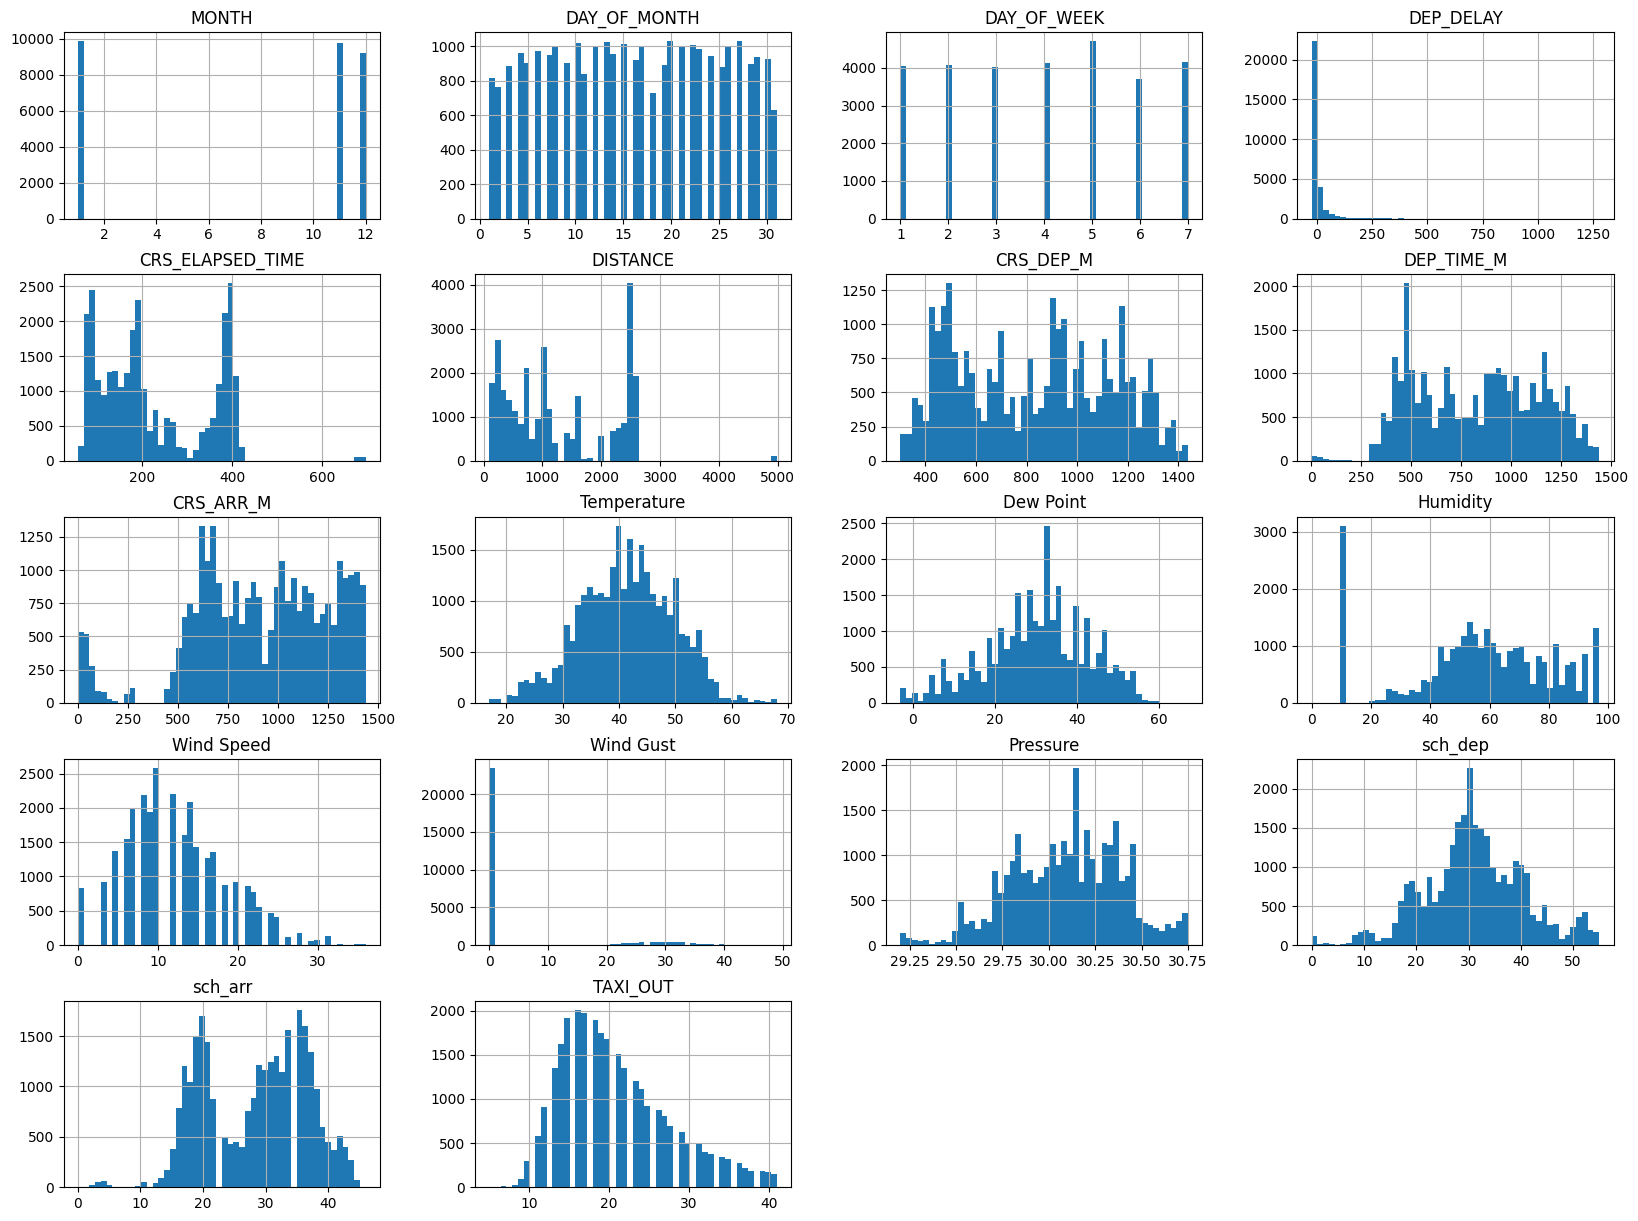

In [41]:
jfk.hist(bins=50, figsize=(20, 15))
plt.show

In [42]:
# understand the stats of Taxi_Out, time it takes to maneuver the aircraft on the ground from gate to runaway
# Select the columns I want to analyze
selected_columns = [ "TAXI_OUT", "DEP_DELAY"]

# Generate summary statistics
summary_stats = jfk[selected_columns].describe().round(2)
# Display the summary statistics
print(summary_stats)


       TAXI_OUT  DEP_DELAY
count  28820.00   28820.00
mean      20.86       6.37
std        6.85      38.74
min        5.00     -22.00
25%       16.00      -6.00
50%       19.00      -3.00
75%       25.00       2.00
max       41.00    1276.00


# Most Frequent Airports

In [43]:
nb_of_airports = len(jfk['DEST'].unique())
print(f'Total number of airports: {nb_of_airports}')

Total number of airports: 65


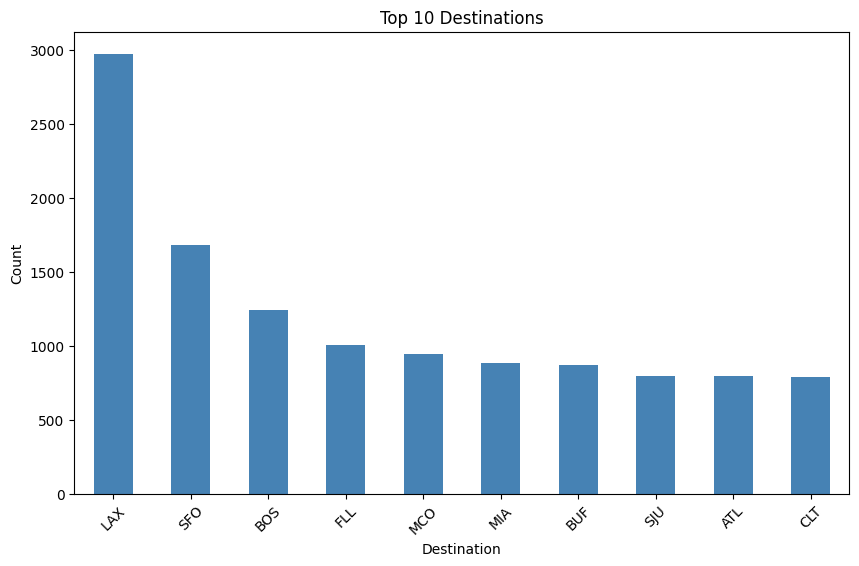

In [44]:

# Count the frequency of each destination
dest_counts = jfk['DEST'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
dest_counts.plot(kind='bar', color= 'steelblue')
plt.title('Top 10 Destinations')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the bar chart
plt.show()


# Is there a link between airlines and departure delays?

In [45]:
number_of_airlines = len(jfk['OP_UNIQUE_CARRIER'].unique())
print(f'Total number of airlines: {number_of_airlines}')

Total number of airlines: 9


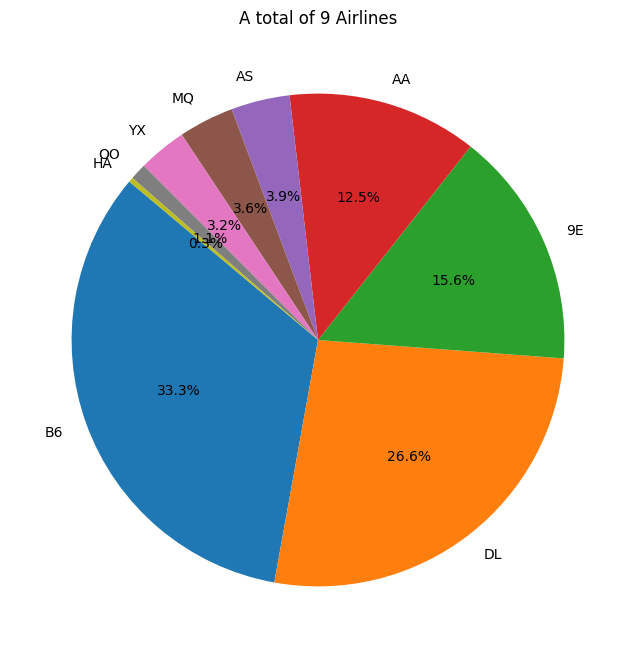

In [46]:
# Count the number of flights for each airline
flight_counts = jfk['OP_UNIQUE_CARRIER'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(flight_counts, labels=flight_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('A total of 9 Airlines')

# Show the pie chart
plt.show()


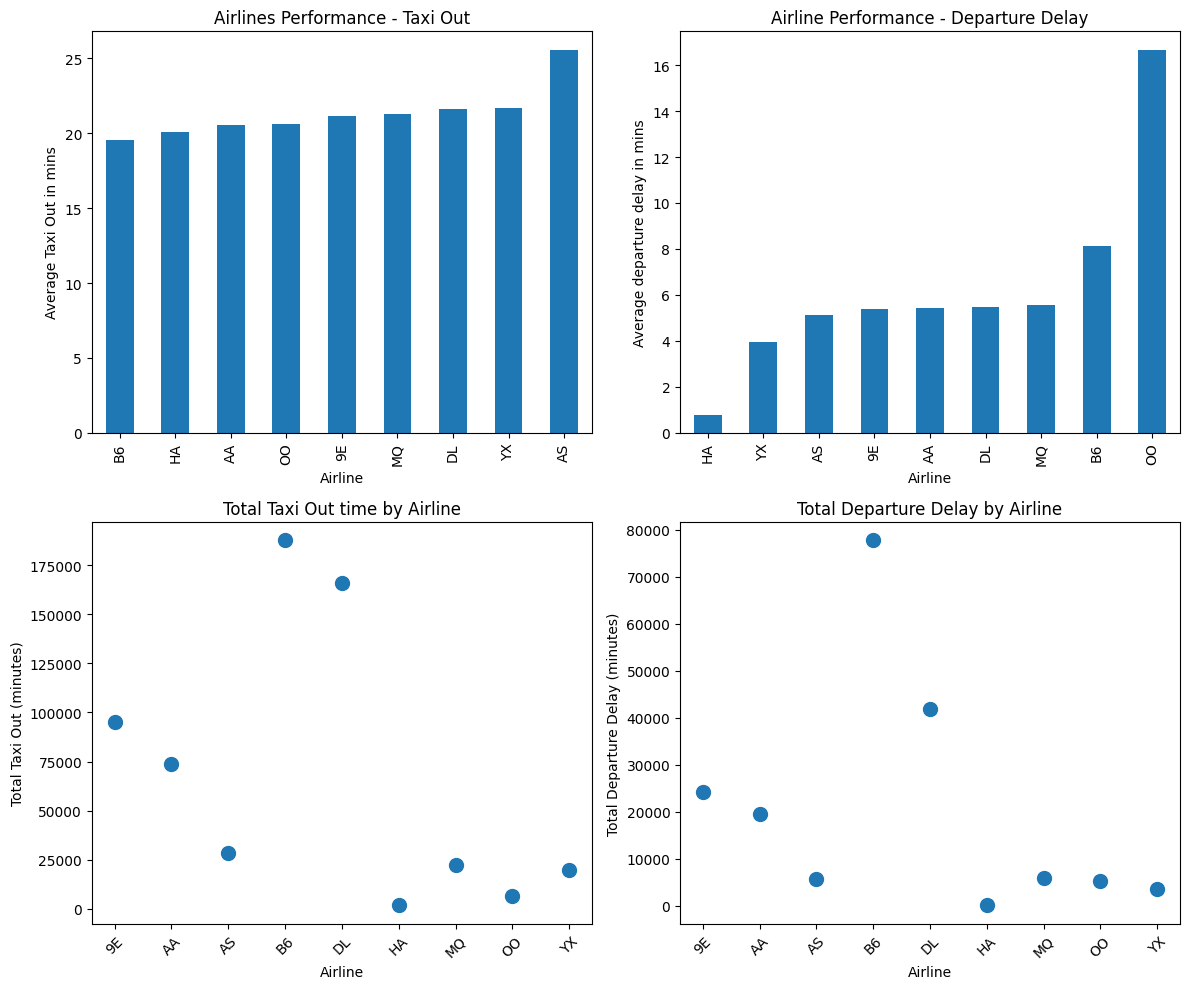

In [47]:
# Calculate the mean TAXI_OUT for each airline
mean_taxi_out = jfk.groupby('OP_UNIQUE_CARRIER')['TAXI_OUT'].mean()
# Sort airlines by mean TAXI_OUT in ascending order
sorted_airlines_taxi_out = mean_taxi_out.sort_values()

# Calculate the mean DEP_DELAY for each airline
mean_dep_delay = jfk.groupby('OP_UNIQUE_CARRIER')['DEP_DELAY'].mean()
# Sort airlines by mean DEP_DELAY in ascending order
sorted_airlines_dep_delay = mean_dep_delay.sort_values()

# Group by airlines and calculate the total taxi out time for each airline
total_taxi_out = jfk.groupby('OP_UNIQUE_CARRIER')['TAXI_OUT'].sum()
# Group by airlines and calculate the total departure delay for each airline
total_dep_delay = jfk.groupby('OP_UNIQUE_CARRIER')['DEP_DELAY'].sum()

# Create a canvas with four subplots arranged in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1: Bar chart for top 10 airlines with the least TAXI_OUT
sorted_airlines_taxi_out.head(10).plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Airlines Performance - Taxi Out')
axes[0, 0].set_xlabel('Airline')
axes[0, 0].set_ylabel('Average Taxi Out in mins')

# Subplot 2: Bar chart for top 10 airlines with the least DEP_DELAY
sorted_airlines_dep_delay.head(10).plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Airline Performance - Departure Delay')
axes[0, 1].set_xlabel('Airline')
axes[0, 1].set_ylabel('Average departure delay in mins')

# Subplot 3: Scatter plot for total taxi out time by airline
axes[1, 0].scatter(total_taxi_out.index, total_taxi_out.values, marker='o', s=100)
axes[1, 0].set_title('Total Taxi Out time by Airline')
axes[1, 0].set_xlabel('Airline')
axes[1, 0].set_ylabel('Total Taxi Out (minutes)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Subplot 4: Scatter plot for total departure delay by airline
axes[1, 1].scatter(total_dep_delay.index, total_dep_delay.values, marker='o', s=100)
axes[1, 1].set_title('Total Departure Delay by Airline')
axes[1, 1].set_xlabel('Airline')
axes[1, 1].set_ylabel('Total Departure Delay (minutes)')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the canvas with all four subplots
plt.show()


# Which day of the week has the most delays?

In [48]:
# Assuming I have a DataFrame 'jfk' with the columns 'DAY_OF_WEEK', 'TAXI_OUT', and 'DEP_DELAY'

# Group by day of the week and calculate the total taxi out time for each day
total_taxi_out_by_day = jfk.groupby('DAY_OF_WEEK')['TAXI_OUT'].mean()

# Find the day with the most total taxi out time
day_with_most_taxi_out = total_taxi_out_by_day.idxmax()

# Group by day of the week and calculate the total departure delay for each day
total_dep_delay_by_day = jfk.groupby('DAY_OF_WEEK')['DEP_DELAY'].mean()

# Find the day with the most total departure delay
day_with_most_dep_delay = total_dep_delay_by_day.idxmax()

print(f"Day with the most total taxi out time: {day_with_most_taxi_out}")
print(f"Day with the most total departure delay: {day_with_most_dep_delay}")


Day with the most total taxi out time: 4
Day with the most total departure delay: 6


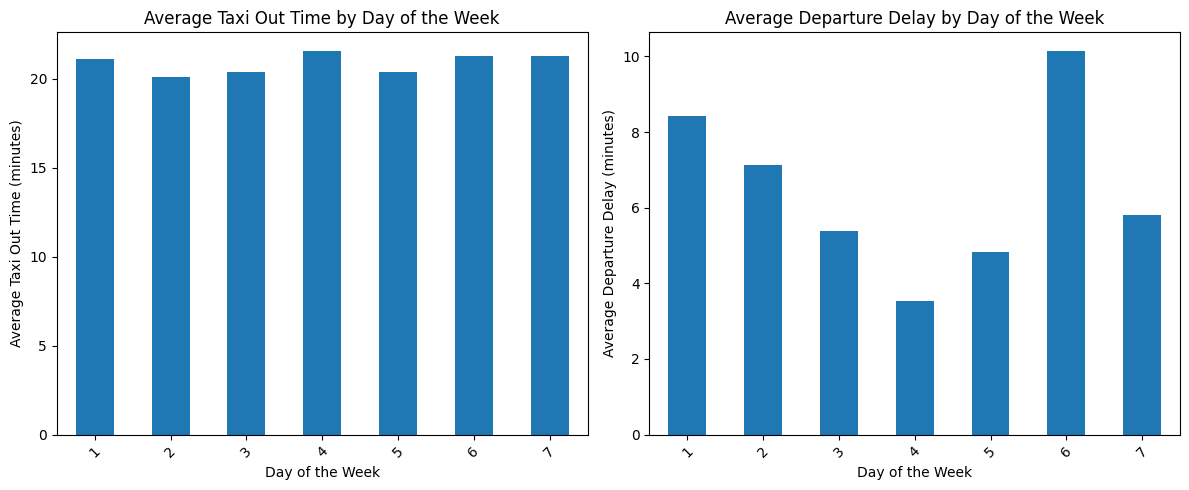

In [49]:

# Assuming you have a DataFrame 'jfk' with the columns 'DAY_OF_WEEK', 'TAXI_OUT', and 'DEP_DELAY'

# Group by day of the week and calculate the Average taxi out time for each day
average_taxi_out_by_day = jfk.groupby('DAY_OF_WEEK')['TAXI_OUT'].mean()

# Group by day of the week and calculate the Average departure delay for each day
average_dep_delay_by_day = jfk.groupby('DAY_OF_WEEK')['DEP_DELAY'].mean()

# Create a canvas with two subplots in a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Average taxi out time by day of the week
average_taxi_out_by_day.plot(kind='bar', ax=axes[0])
axes[0].set_title('Average Taxi Out Time by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Average Taxi Out Time (minutes)')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Subplot 2: Average departure delay by day of the week
average_dep_delay_by_day.plot(kind='bar', ax=axes[1])
axes[1].set_title('Average Departure Delay by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Average Departure Delay (minutes)')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust spacing between subplots
plt.tight_layout()

# Show the canvas with both subplots
plt.show()


Correlation Matrix

In [50]:
# We wild drop many columns related to scheduling since these are captured by the dep_delay and taxi_out
dropping = ['CRS_DEP_M', 'CRS_ARR_M', 'CRS_ELAPSED_TIME', 'DEP_TIME_M', 'sch_dep', 'sch_arr']

# Drop the specified columns from the DataFrame
jfk = jfk.drop(columns= dropping)


In [51]:
# plot correl matrix
# correl matrix
correl_mat= jfk.corr(numeric_only= True) # no need to do iloc and select columns
correl_mat
# neg correl means weak linear relati betwee 2 variable. increase in one ==> other tend to decrease

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,DISTANCE,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.000144,0.135682,0.135040,0.012515,-0.035097,-0.051014,-0.085274,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,-0.002762,-0.132457,-0.040129,0.096215,-0.093211,-0.088991,0.016871,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.002450,0.013081,-0.073816,0.001627,0.095943,0.127689,0.102289,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.031507,-0.032261,-0.000013,-0.011776,0.067718,0.044340,-0.064939,0.034881
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,1.000000,-0.009923,0.009789,0.015110,-0.010734,-0.009522,0.005692,0.059856
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.009923,1.000000,0.787864,0.054401,0.010603,-0.039487,-0.376730,-0.067574
Dew Point,0.135040,-0.040129,-0.073816,-0.000013,0.009789,0.787864,1.000000,0.195262,-0.142122,-0.163160,-0.489134,0.010216
Humidity,0.012515,0.096215,0.001627,-0.011776,0.015110,0.054401,0.195262,1.000000,-0.110274,-0.106828,0.033677,-0.026826
Wind Speed,-0.035097,-0.093211,0.095943,0.067718,-0.010734,0.010603,-0.142122,-0.110274,1.000000,0.698795,-0.309978,0.062522
Wind Gust,-0.051014,-0.088991,0.127689,0.044340,-0.009522,-0.039487,-0.163160,-0.106828,0.698795,1.000000,-0.186249,0.095643


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

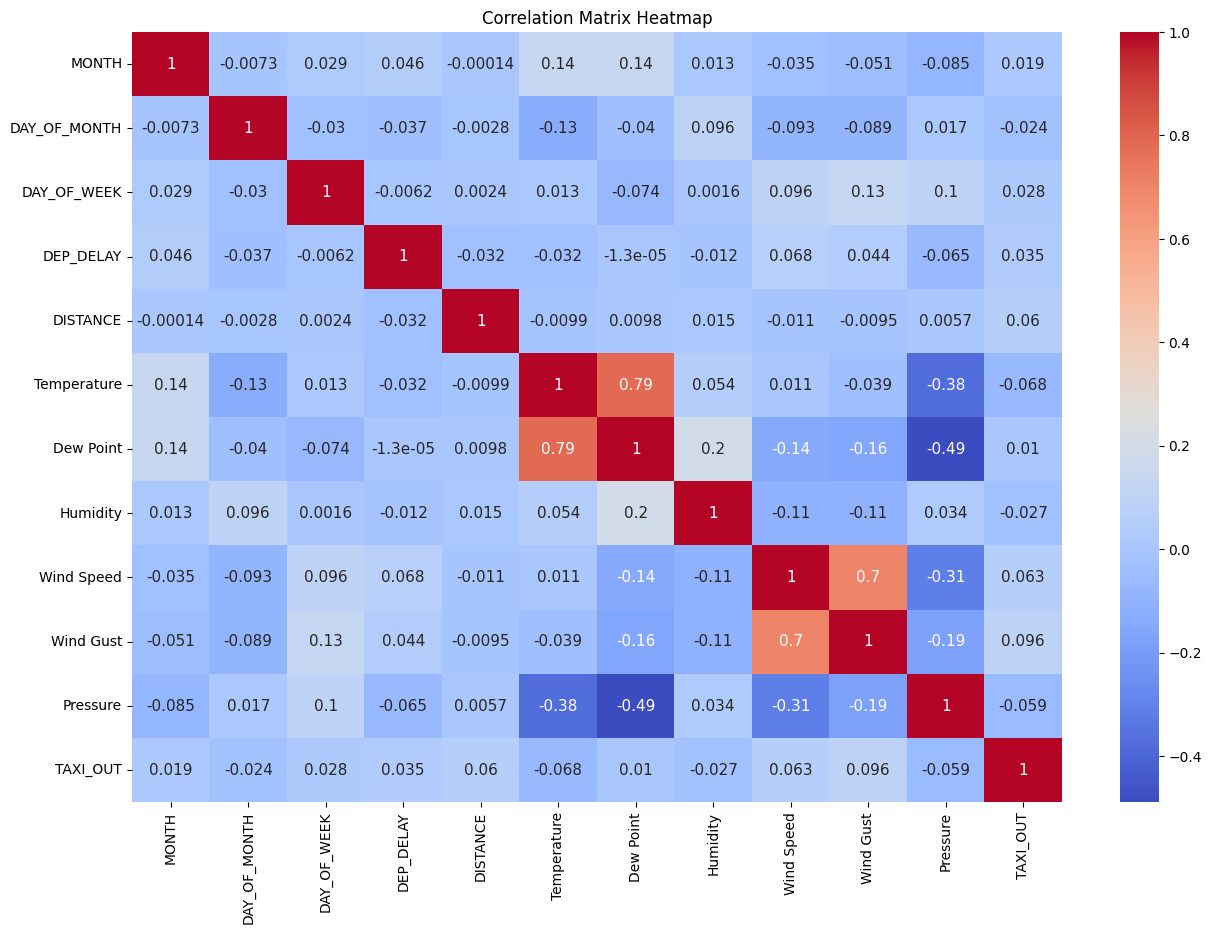

In [52]:
plt.figure(figsize=(15,10)) #to increase the size of the figure
sns.heatmap(correl_mat, cmap = 'coolwarm', annot=True, annot_kws={'size': 11})
plt.title("Correlation Matrix Heatmap", loc="center")

# Machine learning model: Single regression
Here we will build a single linear regression of take_out (the target) and wind Gust, the independant variable


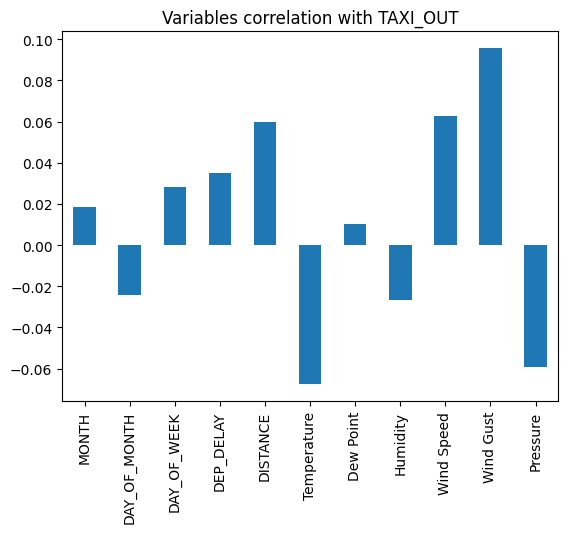

In [53]:
# First let's look at the correlation of features vs. TAXI_OUT
# Select all numeric columns except 'TAXI_OUT'
numeric_cols_except_taxi_out = jfk.select_dtypes(include=[np.number]).drop(columns=['TAXI_OUT'])

# Calculate correlations with 'TAXI_OUT'
correlation = numeric_cols_except_taxi_out.corrwith(jfk['TAXI_OUT'])

# Create a bar plot
correlation.plot(kind='bar', title='Variables correlation with TAXI_OUT')
plt.show()



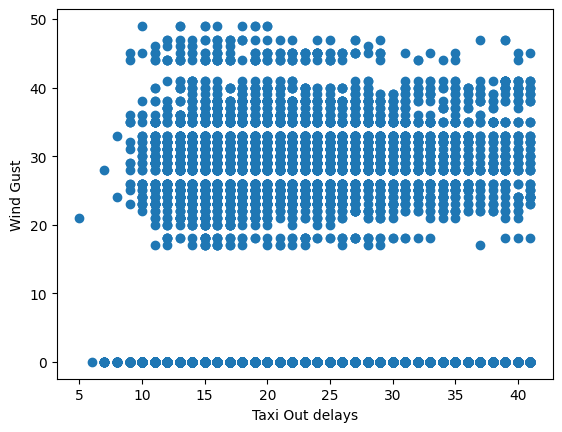

In [54]:
# scatter plot of relationship that exist
plt.scatter(jfk["TAXI_OUT"], jfk["Wind Gust"] )

# label axis
plt.xlabel("Taxi Out delays")
plt.ylabel("Wind Gust")
plt.show()
# if postitive the slope will be upward left to right

# Model Building

In [55]:
# model building
x =jfk.iloc[:,12] # our independant variable : wind speed
y =jfk.iloc[:,16] # our dependant variable : Taxi out

In [56]:
# check dimensions
is_1d = x.ndim == 1
if is_1d:
    print("x is a 1D array")
else:
    print("x not a 1D array")
is_1d = y.ndim == 1
if is_1d:
    print("y is a 1D array")
else:
    print("y is not a 1D array")

x is a 1D array
y is a 1D array


In [57]:
# x and y need to be reshaped from a 1D into one 2D array
x = x.to_numpy().reshape(-1, 1)
y = y.to_numpy().reshape(-1, 1)
x.shape

(28820, 1)

# Model training

Now need parts from training, testing, and validation

We decided to split our data: 80% for training and 20% for testing


In [58]:
# Split the data and targets into training/testing sets. Respectively 80% and 20%. 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 32)


In [59]:
x_train.shape # we are training our model with a sample of 23056
x_test.shape # we are testing our model with a sample of 5764

(5764, 1)

In [60]:
x_train


array([[15],
       [ 7],
       [ 9],
       ...,
       [15],
       [ 6],
       [16]], dtype=int64)

In [61]:
# model training
lin_reg = LinearRegression() # create an object for linear regression
lin_reg.fit(x_train,y_train) # Train the model i.e. perform the linear regression

LinearRegression()

# Model Testing

In [62]:
# Prediction on remaining x_test based on info from train model, lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
actual = y_test

# what are the coefficient and intercept our our regression Y = ax +b?
coeff= np.round(lin_reg.coef_,3)
interc = np.round(lin_reg.intercept_,2)

#access the elements as scalars
coeff_scalar = coeff[0,0]
interc_scalar = interc[0]

print(f"The coefficient and intercept are {coeff_scalar} and {interc_scalar}.")

The coefficient and intercept are 0.072 and 19.96.


# Model Evaluation
now we check for accuracy of our model 

(mean abs error, mean square, root mean square error, r-square, min abs error)

In [63]:
# we need to change how y and y_pred look. 
jfk =pd.DataFrame({"actual target y_test": y_test.flatten(), "Predicted target y_pred": np.round(y_pred.flatten(),2)})

# We added a new column 'Difference' that calculates the difference
jfk['Difference (%)'] = round(((jfk['actual target y_test'] - jfk['Predicted target y_pred'])/ jfk['actual target y_test'])*100,2)

# Print the updated DataFrame
print(jfk)

      actual target y_test  Predicted target y_pred  Difference (%)
0                       23                    20.90            9.13
1                       14                    22.35          -59.64
2                       22                    21.27            3.32
3                       19                    21.48          -13.05
4                       20                    20.83           -4.15
...                    ...                      ...             ...
5759                    18                    20.54          -14.11
5760                    16                    20.32          -27.00
5761                    34                    21.77           35.97
5762                    17                    21.48          -26.35
5763                    19                    20.90          -10.00

[5764 rows x 3 columns]


Key metrics

In [64]:
# Mean abs error # Mean Square error, # Root mean sq error, # Rsquared
# Mean abs error  mae= measuring abs diff between pred and actual. A lower mae ~ model close to making a meaningful pred
# Mean sq error mse = measure the sqd diff. the lower the better
# Root mean sq error = SQ root of the diff between pred and actual. Lower the better
# Rsquared = check the % of variance of dep variable that can be explained by the indep variable. The higher the better


In [65]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print('MAE:', np.round(mae,2))
print('MSE:', np.round(metrics.mean_squared_error(y_test, y_pred),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print('R2:', np.round(metrics.r2_score(y_test, y_pred),4))


MAE: 5.56
MSE: 47.84
RMSE: 6.92
R2: 0.002


Ridge  Lasso regressions

In [66]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
rreg =Ridge(alpha=0.01)
rreg.fit(x_train,y_train)
y_pred = rreg.predict(x_test)
actual = y_test
rmse= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Ridge Regression:", np.round(rmse,2))

# LASSO REGRESSION
from sklearn.linear_model import Lasso
l=Lasso(alpha=0.05)
l.fit(x_train,y_train)
prediction = l.predict(x_test)
actual = y_test
rmse= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Lasso Regression:", np.round(rmse,2))

Ridge Regression: 6.92
Lasso Regression: 6.92
